<a href="https://colab.research.google.com/github/andre-almd/Analisando-os-Dados-do-Airbnb/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Completa

### - Aluno: Daniel Almeida de Toledo
### - Prontuário: BT3031926

## Obtenção dos Dados


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette='rocket')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/IFSP/6º Semestre/Análise de Dados/Database"

Mounted at /content/drive


In [5]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv(path + '/pessoas_analise_completa.csv', sep=',')

## Análise dos Dados


### **Dicionário das Variáveis**

* **regiao**: Região geográfica de residência (e.g., Rio de Janeiro, Goiás, São Paulo).  
* **idade**: Idade da pessoa (em anos).  
* **renda**: Renda mensal da pessoa (em milhares de reais).  
* **estado_civil**: Estado civil, representado por números:
  - 0: Solteiro(a)
  - 1: Casado(a)  
* **educacao**: Nível de escolaridade:
  - Fundamental
  - Médio
  - Mestrado
  - Doutorado  
* **tempo_emprego**: Tempo de emprego atual (em anos).  
* **situacao_aposentadoria**: Situação em relação à aposentadoria:
  - 0: Não aposentado(a)
  - 1: Aposentado(a)  
* **genero**: Gênero da pessoa:
  - 0: Masculino
  - 1: Feminino  
* **codigo_residencia**: Tipo de residência:
  - Casa
  - Apartamento
  - Chalé
  - Sítio
  - Fazenda
  - Condomínio  
* **altura**: Altura da pessoa (em metros).  

In [6]:
# mostrar as 5 primeiras entradas
df.head()

,regiao,idade,renda,estado_civil,educacao,tempo_emprego,situacao_aposentadoria,genero,codigo_residencia,altura
0,Rio de Janeiro,44,64,1,Mestrado,5,0,0,Casa,1.69
1,Goiás,33,136,1,Doutorado,5,0,0,Chalé,1.98
2,Goiás,52,116,1,Fundamental,29,0,1,Casa,1.87
3,Rio de Janeiro,33,33,0,Medio,0,0,1,Apartamento,1.80
4,Rio de Janeiro,30,30,1,Fundamental,2,0,0,Sítio,1.58


In [7]:
df.shape

(1000, 10)

In [8]:
# Descrição estatística dos dados
df.describe()

,idade,renda,estado_civil,tempo_emprego,situacao_aposentadoria,genero,altura
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.684000,77.535000,0.495000,10.987000,0.047000,0.517000,1.745230
std,12.558816,107.044165,0.500225,10.082087,0.211745,0.499961,0.146006
min,18.000000,9.000000,0.000000,0.000000,0.000000,0.000000,1.500000
25%,32.000000,29.000000,0.000000,3.000000,0.000000,0.000000,1.620000
50%,40.000000,47.000000,0.000000,8.000000,0.000000,1.000000,1.750000
75%,51.000000,83.000000,1.000000,17.000000,0.000000,1.000000,1.870000
max,77.000000,1668.000000,1.000000,47.000000,1.000000,1.000000,2.000000


### **Análise Estatística Descritiva**

Com base na análise descritiva dos dados, algumas observações podem ser feitas:

- A **idade** média é de aproximadamente 42 anos, com um desvio padrão de cerca de 12,56 anos. Embora a maioria das idades esteja entre 32 (25%) e 51 anos (75%), o valor máximo é 77, indicando uma possível concentração maior em faixas etárias mais altas.

- A **renda** apresenta uma média de 77 mil, mas com um desvio padrão alto (107 mil). Isso sugere que existem grandes variações nos valores de renda. A mediana está em 47 mil, e 75% dos dados estão abaixo de 83 mil, mas o valor máximo chega a 1,668 milhão, indicando **outliers** que podem distorcer a média.

- O **tempo de emprego** médio é de aproximadamente 11 anos, com valores variando de 0 a 47 anos. Aqui, 75% dos dados estão abaixo de 17 anos, o que significa que os valores acima disso são relativamente raros.

- Para a **altura**, a média é de aproximadamente 1,745 metros, com um desvio padrão de 0,146. Os valores variam de 1,5 metros (mínimo) a 2 metros (máximo), o que parece razoável e dentro de padrões humanos normais.

- O **estado civil**, representado como 0 (solteiro) e 1 (casado), mostra uma proporção quase igual, com a média de 0,495.

- A **situação de aposentadoria**, com média de 0,047, indica que apenas cerca de 4,7% das pessoas no dataset estão aposentadas.

- O **gênero**, codificado como 0 (masculino) e 1 (feminino), tem uma média de 0,517, o que sugere uma proporção quase igual de homens e mulheres.

### **Observações**

- A **renda** apresenta uma disparidade significativa com valores muito elevados (máximo de R$1,668 milhão), o que sugere a presença de **outliers** que podem influenciar as análises posteriores.

- A grande variação no **tempo de emprego**, com valores máximos de até 47 anos, também deve ser considerada, pois pode conter dados de pessoas em empregos muito longos ou registros atípicos.

- A altura parece razoável e não apresenta discrepâncias significativas, mas as variáveis **renda** e **tempo de emprego** merecem uma análise mais detalhada para verificar a presença e o impacto dos **outliers**.



### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [9]:
# identificar o volume de dados do DataFrame
print(f'O dataset possui {df.shape[0]} entradas (registros) e {df.shape[1]} atributos (variáveis).')
# verificar os tipos de dados dos atributos
print(f'\nOs tipos dos atributos são do tipo:\n{df.dtypes}')

O dataset possui 1000 entradas (registros) e 10 atributos (variáveis).

Os tipos dos atributos são do tipo:
regiao                     object
idade                       int64
renda                       int64
estado_civil                int64
educacao                   object
tempo_emprego               int64
situacao_aposentadoria      int64
genero                      int64
codigo_residencia          object
altura                    float64
dtype: object


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [10]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes

print(f'As variáveis com mais dados faltantes, em porcentagem (%), são:\n')
((df.isnull().sum() / df.shape[0])*100).sort_values(ascending=False)

As variáveis com mais dados faltantes, em porcentagem (%), são:



,0
regiao,0.0
idade,0.0
renda,0.0
estado_civil,0.0
educacao,0.0
tempo_emprego,0.0
situacao_aposentadoria,0.0
genero,0.0
codigo_residencia,0.0
altura,0.0


Não existe nenhum linha com dados faltantes. O que mostra uma base de dados bem consistente

### **Q3. Qual o tipo de distribuição das variáveis?**

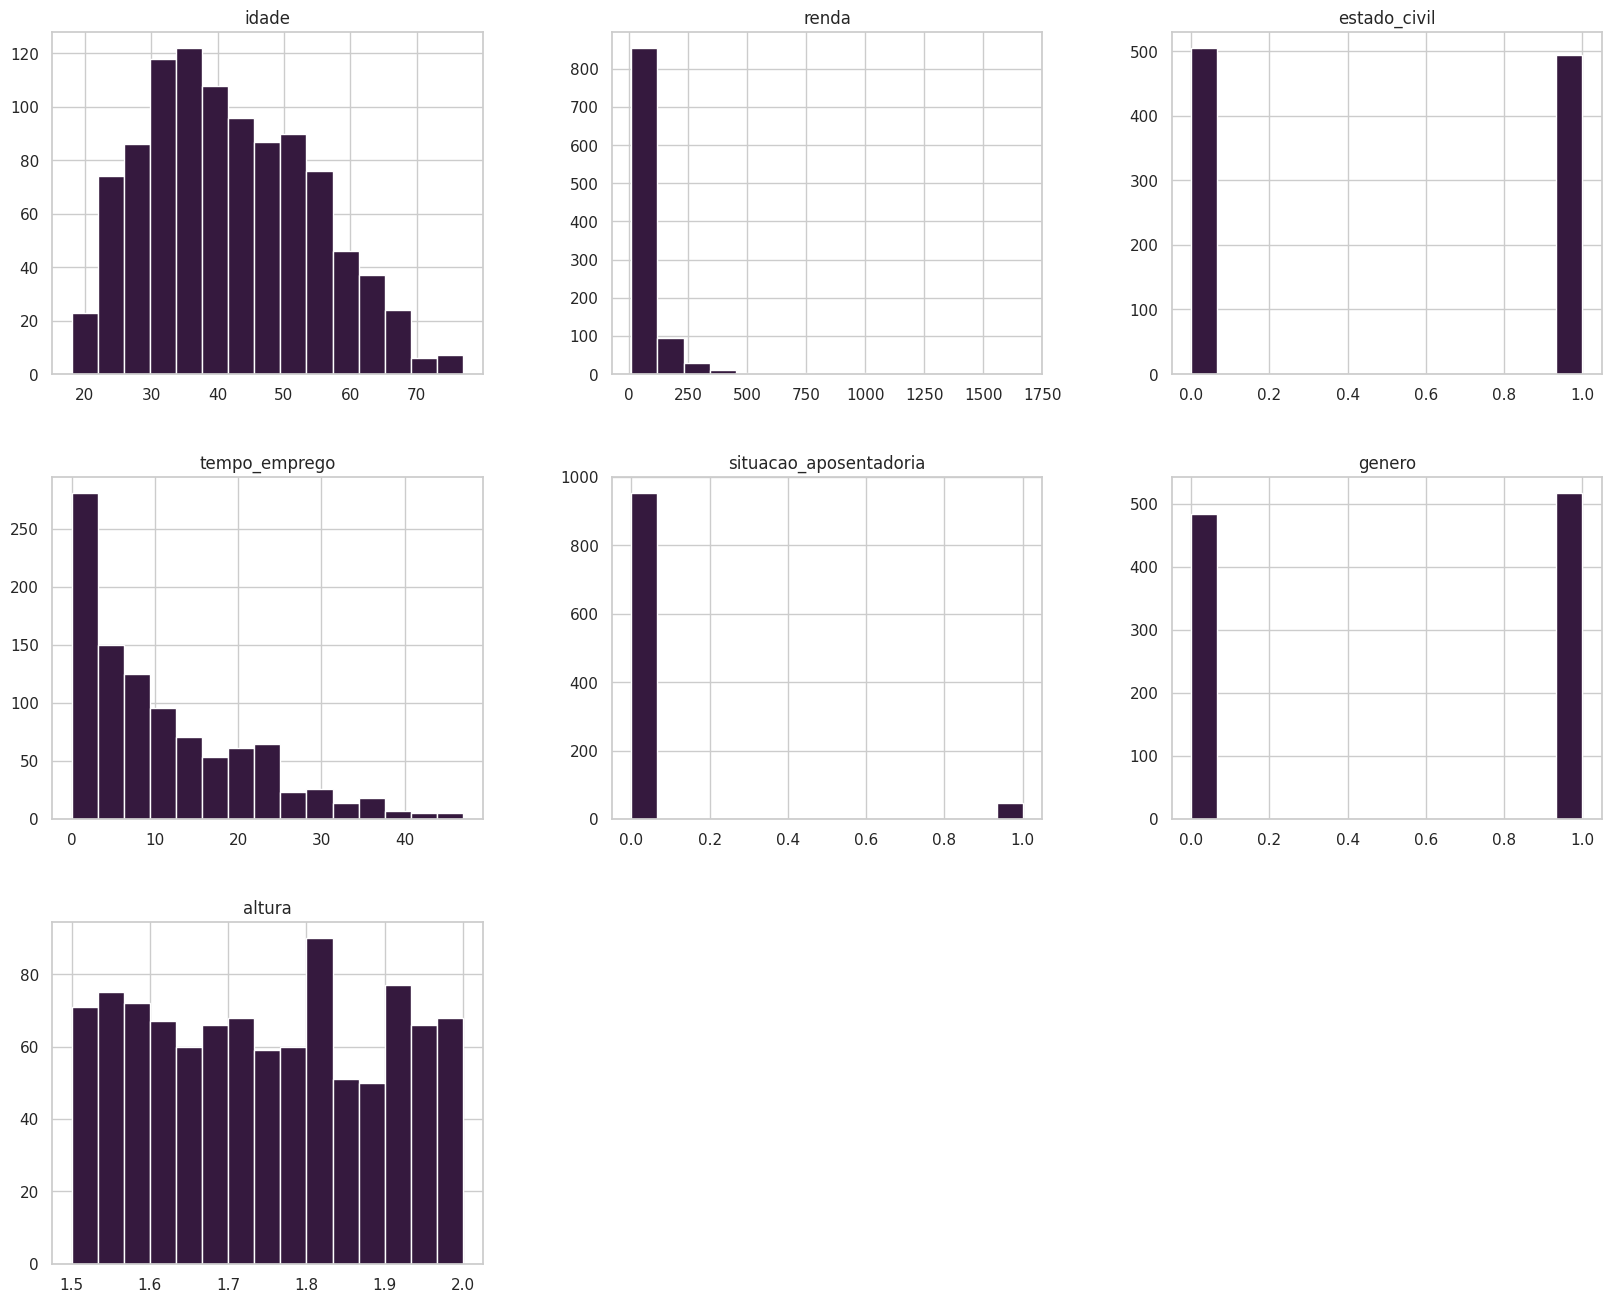

In [11]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(20,16));

# Análise dos Histogramas

### **Idade**
- A maior parte da população está na faixa etária de 25 a 40 anos.
- Existe uma queda gradual na frequência conforme a idade aumenta.
- Há poucos indivíduos acima de 60 anos.

### **Renda**
- A maioria das pessoas possui rendimentos muito baixos (concentrados no início do eixo).
- Existe uma distribuição altamente assimétrica, com raros indivíduos de rendas altas.

### **Estado Civil**
- Ambas as categorias estão bem distribuídas, com frequências similares.

### **Tempo de Emprego**
- A maior concentração está nos primeiros anos de emprego, entre 0 a 10 anos.
- O número de pessoas diminui à medida que o tempo de emprego aumenta.
- Existem poucos casos de indivíduos com mais de 30 anos de trabalho.

### **Situação de Aposentadoria**
- Predominância de indivíduos não aposentados (categoria `0`).
- Poucos registros de pessoas aposentadas.

### **Gênero**
- Há equilíbrio entre os gêneros, com frequências próximas.

### **Altura**
- A altura está uniformemente distribuída entre os valores de 1,5m e 2m.
- Pequenos picos em alturas específicas podem indicar dados agrupados.



### **Q4. RENDA**


---

#### **A. Renda x Gênero**

<ipython-input-12-fd8b05a62049>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=['Feminino', 'Masculino'], y=renda_media_genero.values, palette='viridis')


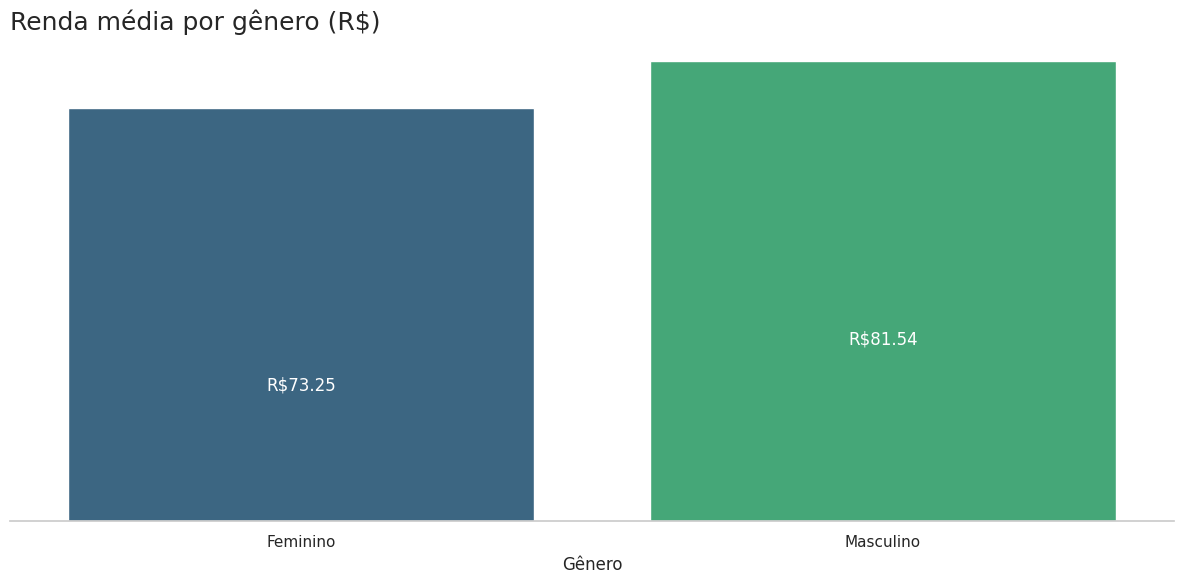

In [12]:
# Calcular a renda média por gênero
renda_media_genero = df.groupby('genero')['renda'].mean()

# Gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=['Feminino', 'Masculino'], y=renda_media_genero.values, palette='viridis')
ax.set_title('Renda média por gênero (R$)', loc='left', fontsize=18)
ax.set_xlabel('Gênero')
ax.set_ylabel('')
ax.spines[['right', 'top', 'left']].set_visible(False)
ax.tick_params(labelleft=False)
ax.grid(False)

for i, valor in enumerate(renda_media_genero.values):
    ax.text(i, valor - 50, f'R${valor:.2f}', fontsize=12, color='white', ha='center')

plt.tight_layout()
plt.show()


<ipython-input-20-424d71be325a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df['genero'].map({0: 'Feminino', 1: 'Masculino'}), y=df['renda'], palette='viridis')


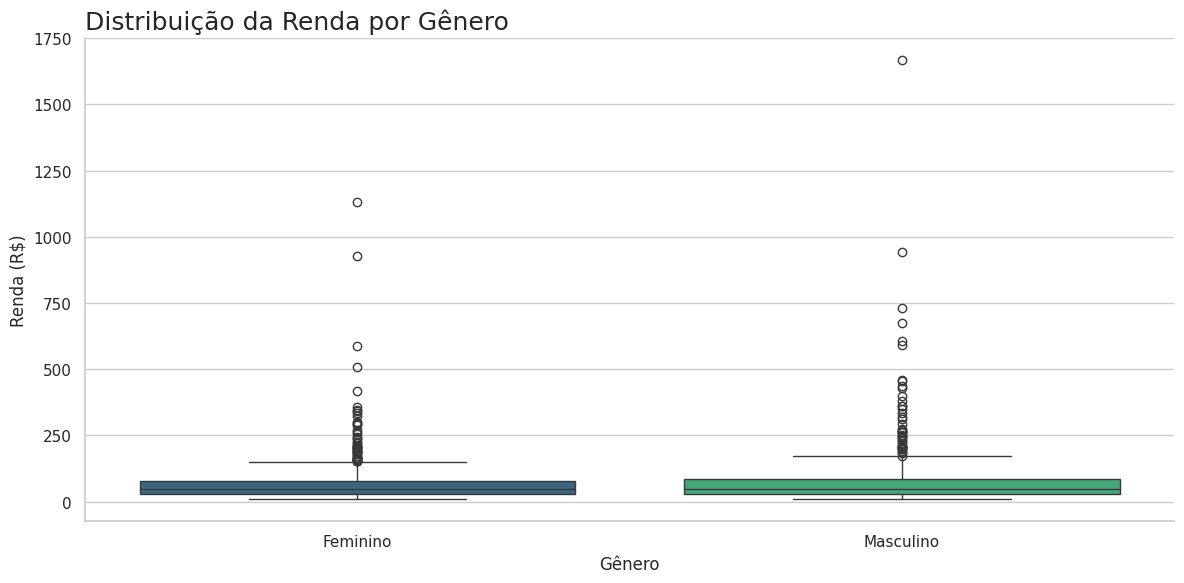

In [20]:
# Boxplot da renda por gênero
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.boxplot(x=df['genero'].map({0: 'Feminino', 1: 'Masculino'}), y=df['renda'], palette='viridis')
ax.set_title('Distribuição da Renda por Gênero', loc='left', fontsize=18)
ax.set_xlabel('Gênero')
ax.set_ylabel('Renda (R$)')
ax.spines[['right', 'top']].set_visible(False)

plt.tight_layout()
plt.show()


### **Inferência:**

A renda média entre homens e mulheres é diferente. O gráfico mostra que o sexo Masculino tem uma renda significativamente maior.

---

#### **B. Renda x Região**

<ipython-input-13-47e6e2692a2e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='regiao', y='renda', data=renda_media_regiao, palette='viridis')


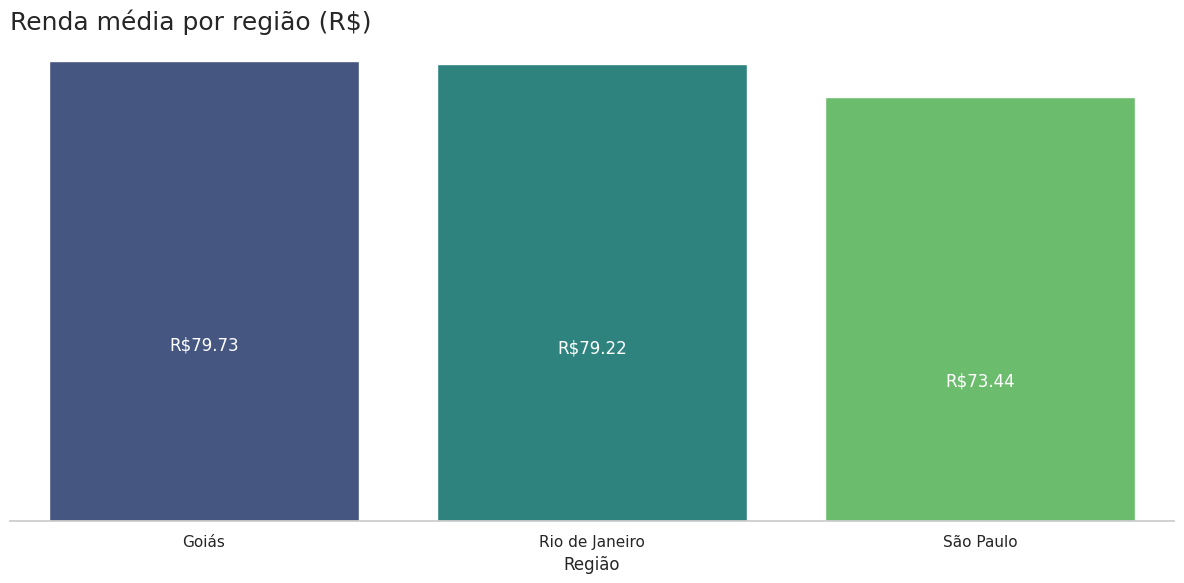

In [13]:
# Calcular a renda média por região
renda_media_regiao = df.groupby('regiao')['renda'].mean().reset_index()

# Gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x='regiao', y='renda', data=renda_media_regiao, palette='viridis')
ax.set_title('Renda média por região (R$)', loc='left', fontsize=18)
ax.set_xlabel('Região')
ax.set_ylabel('')
ax.spines[['right', 'top', 'left']].set_visible(False)
ax.tick_params(labelleft=False)
ax.grid(False)

for i, valor in enumerate(renda_media_regiao['renda']):
    ax.text(i, valor - 50, f'R${valor:.2f}', fontsize=12, color='white', ha='center')

plt.tight_layout()
plt.show()


### **Inferência:**

O gráfico mostra a média de renda para as regiões Goiás, São Paulo e Rio de Janeiro. Podemos observar que a renda de Goiás e Rio de Janeiro são muito próximas, porém de São Paulo é R$ 5 mil a menos.

---

#### **C. Renda x Estado Civil**

<ipython-input-14-c62096c91220>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='estado_civil', y='renda', data=renda_media_estado_civil, palette='viridis')


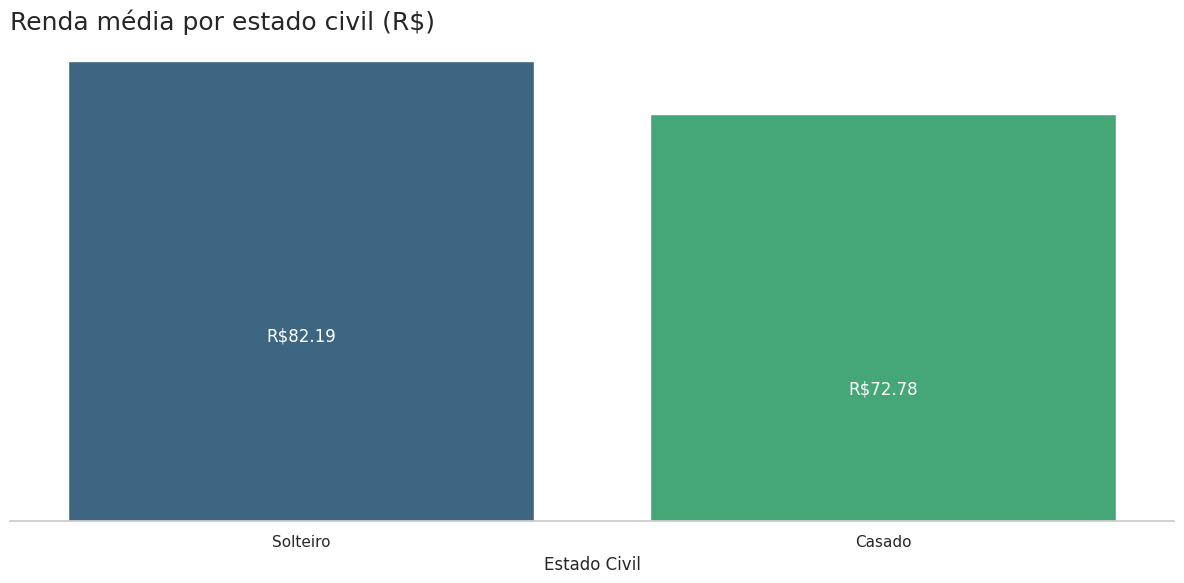

In [14]:
# Calcular a renda média por estado civil
renda_media_estado_civil = df.groupby('estado_civil')['renda'].mean().reset_index()

renda_media_estado_civil['estado_civil'] = renda_media_estado_civil['estado_civil'].map({0: 'Solteiro', 1: 'Casado'})

# Gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x='estado_civil', y='renda', data=renda_media_estado_civil, palette='viridis')
ax.set_title('Renda média por estado civil (R$)', loc='left', fontsize=18)
ax.set_xlabel('Estado Civil')
ax.set_ylabel('')
ax.spines[['right', 'top', 'left']].set_visible(False)
ax.tick_params(labelleft=False)
ax.grid(False)

for i, valor in enumerate(renda_media_estado_civil['renda']):
    ax.text(i, valor - 50, f'R${valor:.2f}', fontsize=12, color='white', ha='center')

plt.tight_layout()
plt.show()


### **Inferência:**

A renda média foi comparada entre os estados civis Solteiro e Casado. A análise evidencia a diferença no rendimento de acordo com o estado civil, onde os solteiros possuem uma renda de 82.190 mil enquanto de casado 72.780

---

#### **D. Renda x Educação**

<ipython-input-15-b7157d54e7bd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='educacao', y='renda', data=renda_media_educacao, palette='viridis')


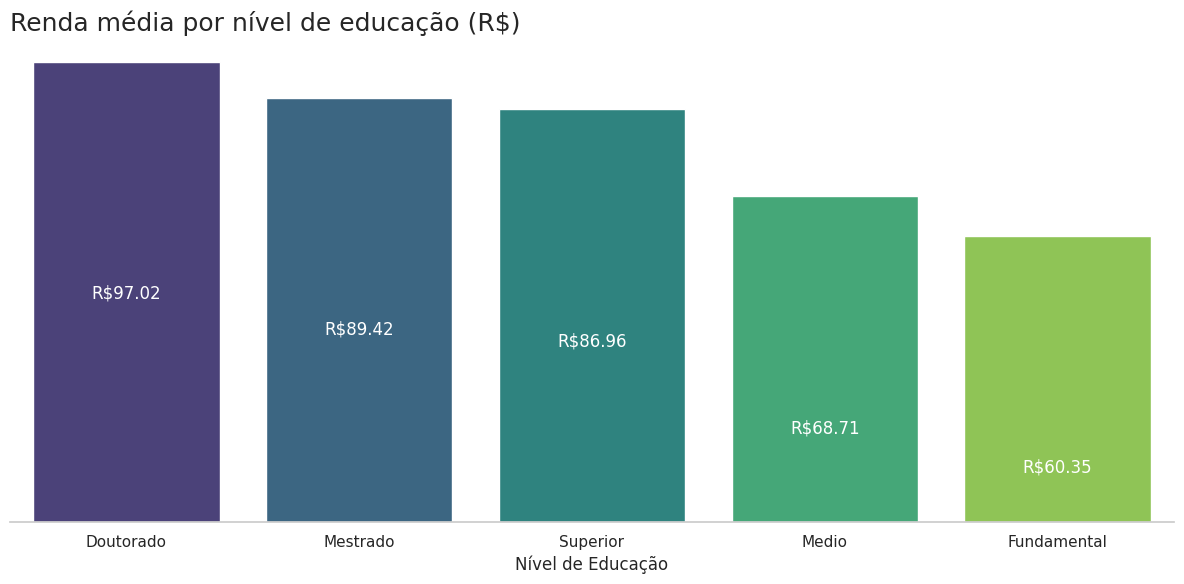

In [15]:
# Calcular a renda média por nível de educação
renda_media_educacao = df.groupby('educacao')['renda'].mean().reset_index()
renda_media_educacao = renda_media_educacao.sort_values(by='renda', ascending=False)

# Gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x='educacao', y='renda', data=renda_media_educacao, palette='viridis')
ax.set_title('Renda média por nível de educação (R$)', loc='left', fontsize=18)
ax.set_xlabel('Nível de Educação')
ax.set_ylabel('')
ax.spines[['right', 'top', 'left']].set_visible(False)
ax.tick_params(labelleft=False)
ax.grid(False)

for i, valor in enumerate(renda_media_educacao['renda']):
    ax.text(i, valor - 50, f'R${valor:.2f}', fontsize=12, color='white', ha='center')

plt.tight_layout()
plt.show()


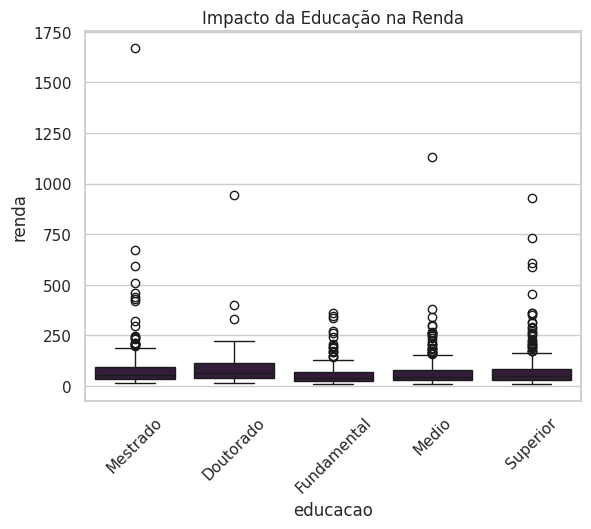

,renda
educacao,
Doutorado,97.015152
Fundamental,60.352941
Medio,68.714286
Mestrado,89.418803
Superior,86.961722


In [16]:
# Boxplot para comparar a renda por nível de educação
sns.boxplot(x='educacao', y='renda', data=df)
plt.title('Impacto da Educação na Renda')
plt.xticks(rotation=45)
plt.show()

# Média da renda por educação
media_renda_educacao = df.groupby('educacao')['renda'].mean()
media_renda_educacao

### **Inferência:**

O gráfico apresenta a média de renda de acordo com os níveis de educação: Fundamental, Médio, Mestrado e Doutorado. Observamos que níveis mais altos de educação tendem a estar associados a maiores rendas.

---

#### **E. Renda x Idade**

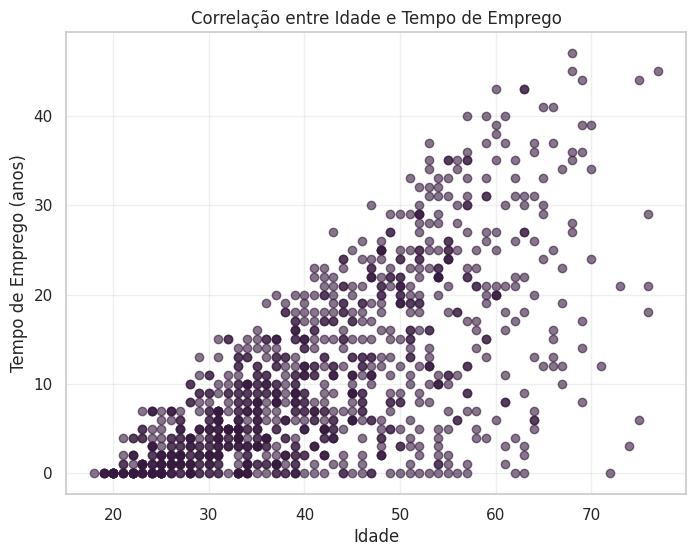

In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df['idade'], df['tempo_emprego'], alpha=0.6)
plt.title('Correlação entre Idade e Tempo de Emprego')
plt.xlabel('Idade')
plt.ylabel('Tempo de Emprego (anos)')
plt.grid(True, alpha=0.3)
plt.show()

### **Q5. Qual a correlação existente entre as variáveis**

In [17]:
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numerical_df.corr()

# Display the correlation matrix
corr


,idade,renda,estado_civil,tempo_emprego,situacao_aposentadoria,genero,altura
idade,1.000000,0.327948,-0.014433,0.670047,0.429440,-0.011419,0.003375
renda,0.327948,1.000000,-0.043984,0.516349,-0.083651,0.038706,0.002035
estado_civil,-0.014433,-0.043984,1.000000,-0.002891,-0.078109,0.008345,-0.033700
tempo_emprego,0.670047,0.516349,-0.002891,1.000000,0.277401,0.046016,0.005024
situacao_aposentadoria,0.429440,-0.083651,-0.078109,0.277401,1.000000,0.053906,0.017620
genero,-0.011419,0.038706,0.008345,0.046016,0.053906,1.000000,-0.002522
altura,0.003375,0.002035,-0.033700,0.005024,0.017620,-0.002522,1.000000


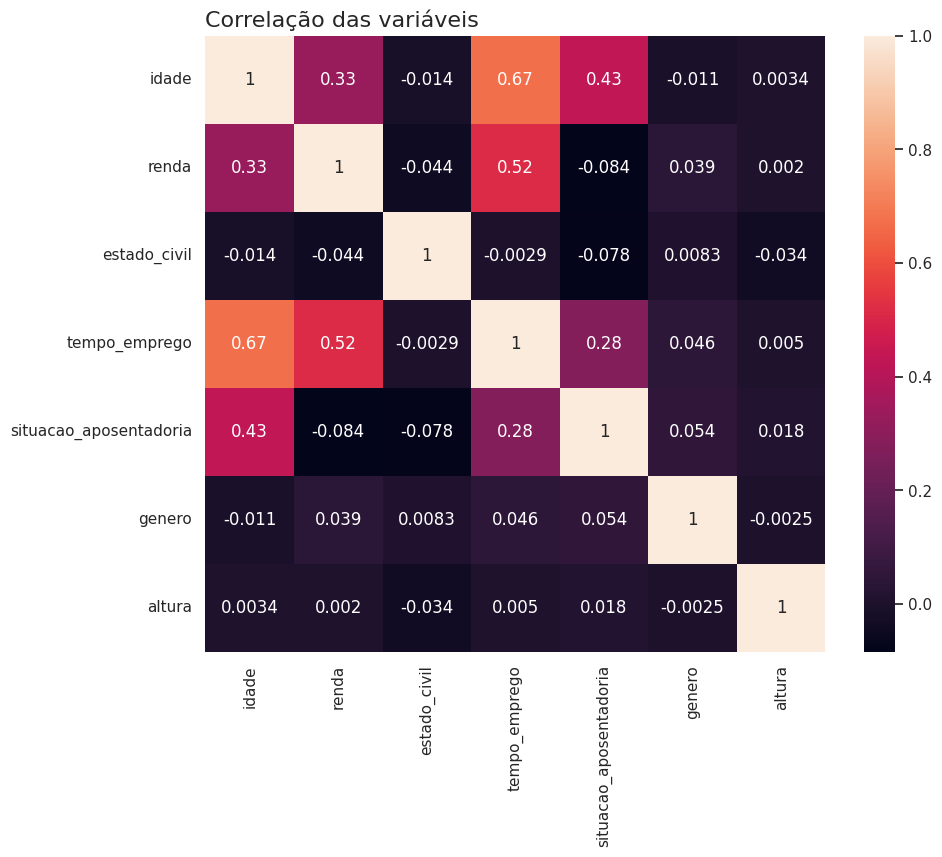

In [18]:
# plotar um heatmap a partir das correlações
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='rocket')
plt.title('Correlação das variáveis', loc='left', fontsize=16)
plt.show()

### **Principais Relações com a Renda**

- **Idade e Renda (0.33):**  
  Há uma correlação moderada e positiva entre a idade e a renda, indicando que pessoas mais velhas tendem a ganhar mais à medida que envelhecem.

- **Tempo de Emprego e Renda (0.52):**  
  O tempo de emprego apresenta a maior correlação com a renda. Isso reflete que quanto mais tempo as pessoas trabalham, maior é a possibilidade de terem salários mais altos, possivelmente devido à experiência acumulada.

- **Situação de Aposentadoria e Renda (-0.084):**  
  Existe uma relação ligeiramente negativa entre aposentadoria e renda, o que sugere que pessoas aposentadas podem ter uma renda um pouco menor, embora a correlação seja muito fraca.

In [19]:
print(f'Valor absoluto da correlação dos atributos com a renda:')
corr.renda.abs().sort_values(ascending=False)[1:]

Valor absoluto da correlação dos atributos com a renda:


,renda
tempo_emprego,0.516349
idade,0.327948
situacao_aposentadoria,0.083651
estado_civil,0.043984
genero,0.038706
altura,0.002035


### Análise das correlações com a `renda`:

1. **Tempo de emprego (0.516349)**: Correlação moderada positiva. Maior tempo de emprego tende a aumentar a renda.

2. **Idade (0.327948)**: Correlação positiva, mas mais fraca. Aumento de idade pode estar relacionado ao aumento da renda devido a mais experiência.

3. **Situação após aposentadoria (0.083651)**: Correlação muito fraca, indicando pouca ou nenhuma relação entre aposentadoria e renda.

4. **Estado civil (0.043984)**: Correlação muito baixa, sugerindo que o estado civil tem pouca influência sobre a renda.

5. **Gênero (0.038706)**: Correlação quase nula, sem impacto significativo sobre a renda.

6. **Altura (0.002035)**: Correlação praticamente inexistente. A altura não afeta a renda.

---


## Conclusão da Análise de Dados

A análise realizada sobre o dataset "pessoas_analise_completa.csv" revelou várias informações importantes sobre o perfil das pessoas registradas. A seguir, estão as principais conclusões:

### 1. Descrição Geral dos Dados

O dataset contém **1000 entradas** e **10 atributos** que abrangem diversas variáveis demográficas e econômicas. Os tipos de dados incluem variáveis numéricas (como idade, renda, tempo de emprego, altura) e categóricas (como região, estado civil, educação, situação de aposentadoria, e gênero).

### 2. Análise Descritiva

- **Idade**: A média é de 42 anos, com um desvio padrão de 12,56 anos. A maior parte da população está concentrada entre 25 e 40 anos, com poucos indivíduos acima de 60 anos.
- **Renda**: A média de renda é de 77 mil reais, mas com uma grande variação (desvio padrão de 107 mil reais), o que sugere a presença de outliers. A mediana está em 47 mil, e o valor máximo de 1,668 milhão de reais aponta para uma alta disparidade de rendimentos.
- **Tempo de Emprego**: O tempo médio de emprego é de 11 anos, com 75% dos dados abaixo de 17 anos. Existe uma concentração de indivíduos com poucos anos de experiência.
- **Altura**: A média de altura é de 1,745 metros, sem discrepâncias significativas.
- **Estado Civil**: A distribuição entre solteiros e casados é quase equilibrada.
- **Situação de Aposentadoria**: Apenas 4,7% dos indivíduos estão aposentados, enquanto a grande maioria ainda está ativa no mercado de trabalho.
- **Gênero**: A proporção de homens e mulheres é equilibrada, com cerca de 51,7% de mulheres e 48,3% de homens.

### 3. Análise de Distribuição

- **Idade**: A distribuição mostra uma maior concentração de indivíduos jovens (25 a 40 anos).
- **Renda**: A distribuição da renda é altamente assimétrica, com uma grande concentração de pessoas com rendimentos baixos.
- **Tempo de Emprego**: A distribuição é assimétrica, com maior número de pessoas com até 10 anos de emprego.
- **Estado Civil**: A distribuição de estado civil é balanceada, com uma proporção quase igual de solteiros e casados.
- **Gênero**: A distribuição entre os gêneros é equilibrada.
- **Altura**: A distribuição é quase uniforme entre 1,5m e 2m de altura.

### 4. Análise de Renda

#### A. Renda x Gênero
A renda média é significativamente maior para os homens do que para as mulheres. Isso pode indicar uma disparidade de gênero no mercado de trabalho.

#### B. Renda x Região
As regiões de Goiás e Rio de Janeiro têm uma média de renda similar, enquanto São Paulo tem uma média de renda cerca de 5 mil reais a menos.

#### C. Renda x Estado Civil
A análise revelou que solteiros possuem uma renda média de 82,190 mil, enquanto casados têm uma média de 72,780 mil. Isso pode sugerir que a situação familiar tem impacto nas rendas.

#### D. Renda x Educação
A análise de renda por nível de educação mostra que pessoas com doutorado possuem a maior média de renda, seguidas por aqueles com mestrado, médio e fundamental. Isso reforça a ideia de que o nível educacional está diretamente relacionado a uma maior renda.

#### E. Renda x Idade
Embora não tenha sido apresentada uma relação direta, a correlação entre idade e tempo de emprego foi observada. Indivíduos mais velhos tendem a ter mais tempo de emprego, o que pode impactar sua renda ao longo do tempo.

### 5. Correlação entre Variáveis
Foi possível observar que existem correlações entre algumas variáveis, como a relação entre idade e tempo de emprego, que mostra que, de modo geral, quanto maior a idade, maior o tempo de emprego. No entanto, a relação entre idade e renda não é tão clara, podendo ser influenciada por outros fatores.

### Conclusões Finais

- O dataset apresenta uma grande variação de renda e tempo de emprego, com alguns outliers que podem distorcer a análise.
- Existem disparidades de renda entre gêneros e estados civis, sendo importante investigar mais a fundo os fatores que contribuem para essas diferenças.
- O nível de educação tem um impacto claro na renda, com níveis mais elevados associados a maiores rendimentos.
- A análise de tempo de emprego também revela uma concentração maior em indivíduos com menos experiência, sugerindo que uma parte significativa da população está no início de sua trajetória profissional.

Essas conclusões podem servir como base para decisões relacionadas a políticas de trabalho, educação e igualdade de gênero, além de ajudar a identificar áreas onde os dados atípicos podem influenciar negativamente as análises e decisões.


---